In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('train.csv')
df.head(20)


NameError: name 'pd' is not defined

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)
print(mean_age)

29.69911764705882


In [ ]:
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
df.drop(columns=['Name', 'Ticket', 'Cabin'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(columns=['Name', 'Ticket', 'Cabin'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})
df['Sex']=df['Sex'].astype(int)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [ ]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [ ]:
df['Embarked']=df['Embarked'].replace({'C':0,'Q':1,'S':2})
df['Embarked']=df['Embarked'].astype(int)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,2
1,2,1,1,1,38.000000,1,0,71.2833,0
2,3,1,3,1,26.000000,0,0,7.9250,2
3,4,1,1,1,35.000000,1,0,53.1000,2
4,5,0,3,0,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,2
887,888,1,1,1,19.000000,0,0,30.0000,2
888,889,0,3,1,29.699118,1,2,23.4500,2
889,890,1,1,0,26.000000,0,0,30.0000,0


In [ ]:
df.to_csv('Done_titanic.csv',index=False)

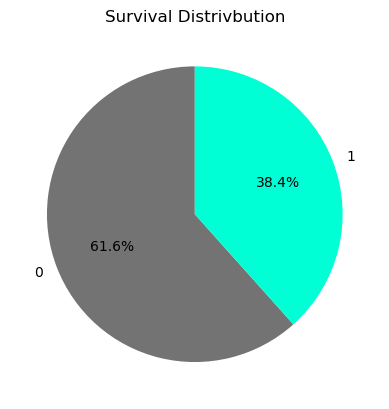

In [ ]:
colors = ['#737373','#00FFD4']
plt.pie(df['Survived'].value_counts(),
    labels = df['Survived'].value_counts().index,
    autopct = '%1.1f%%',startangle=90,colors=colors)
plt.title('Survival Distrivbution')
plt.show()
        

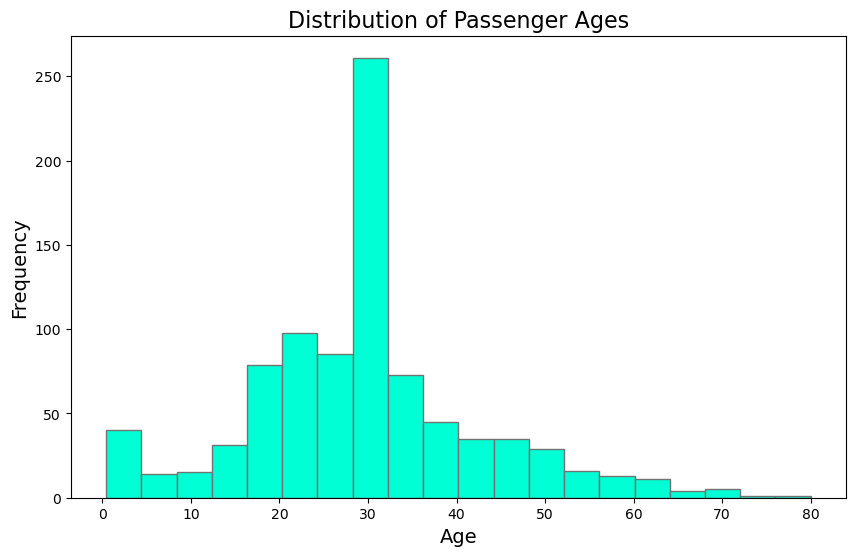

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='#00FFD4', edgecolor='#737373')
plt.title('Distribution of Passenger Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# عرض المخطط
plt.show()

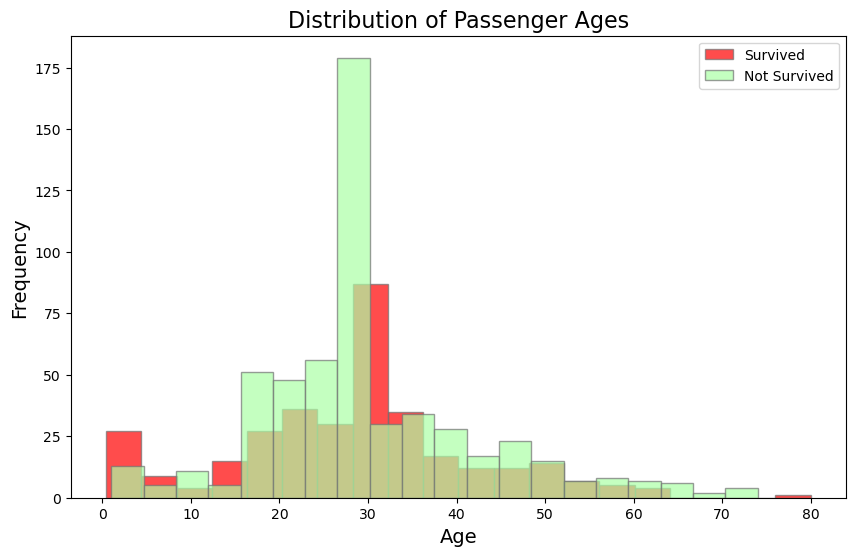

In [ ]:
ages_survived = df[df['Survived'] == 1]['Age'].dropna()
ages_not_survived = df[df['Survived'] == 0]['Age'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(ages_survived, bins=20, color='#FF0000', edgecolor='#737373', alpha=0.7, label='Survived')
plt.hist(ages_not_survived, bins=20, color='#ACFFA6', edgecolor='#737373', alpha=0.7, label='Not Survived')
plt.title('Distribution of Passenger Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

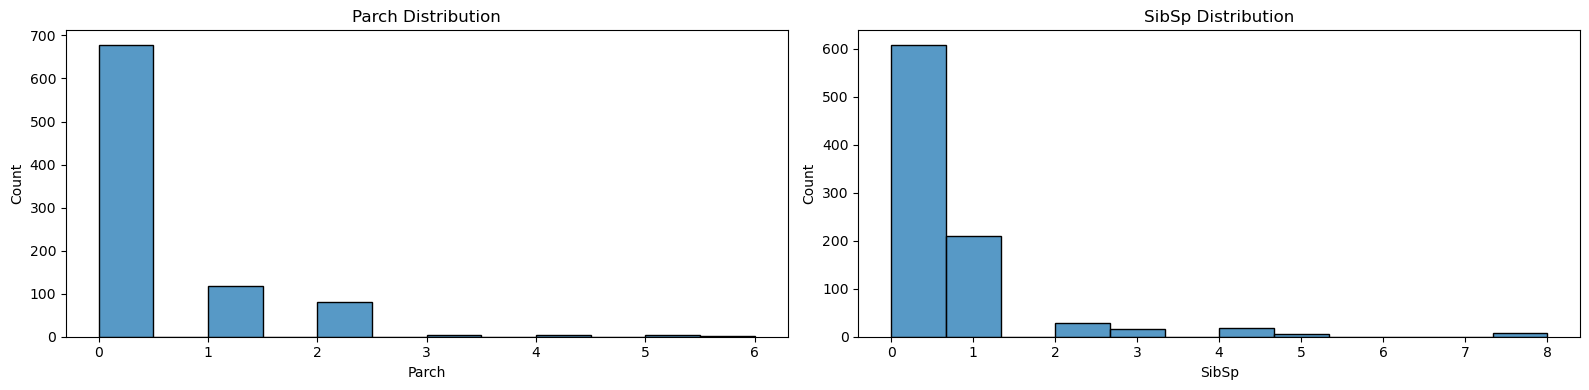

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(data=df, x='Parch', bins=12, ax=axes[0])
axes[0].set_title("Parch Distribution")
sns.histplot(data=df, x='SibSp', bins=12, ax=axes[1])
axes[1].set_title("SibSp Distribution")

plt.tight_layout()
plt.show()

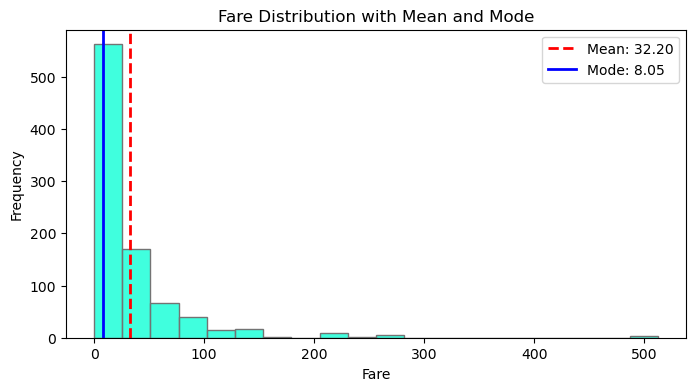

In [ ]:
mean_fare = df['Fare'].mean()
mode_fare = df['Fare'].mode()[0]
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Fare', bins=20, color='#00FFD4', edgecolor='#737373')
plt.axvline(mean_fare, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_fare:.2f}')
plt.axvline(mode_fare, color='blue', linestyle='-', linewidth=2, label=f'Mode: {mode_fare:.2f}')
plt.title("Fare Distribution with Mean and Mode")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

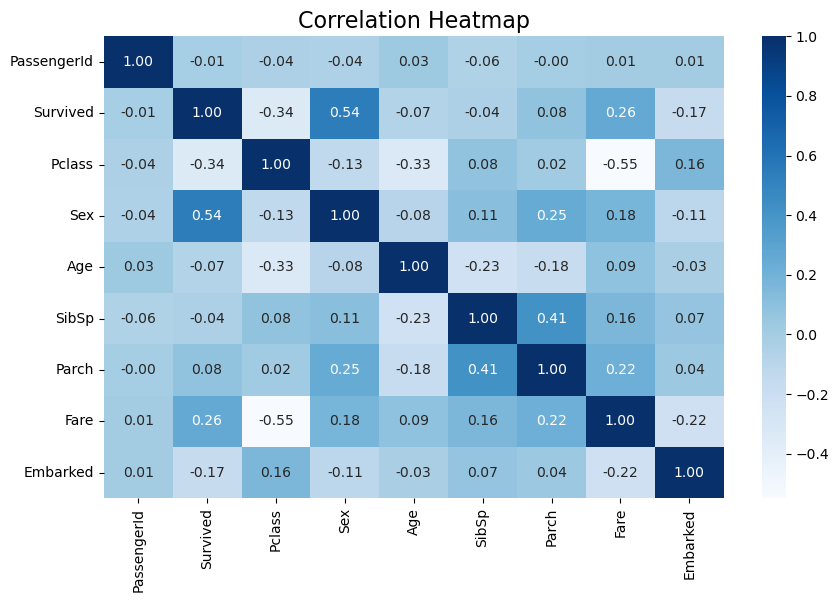

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

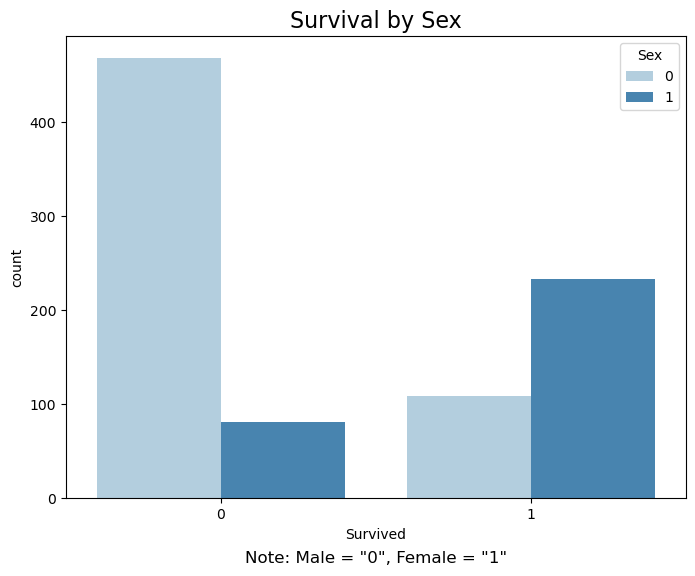

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Survived", hue="Sex", data=df, palette="Blues")
plt.title('Survival by Sex', fontsize=16)
plt.text(0.5, -0.14, 'Note: Male = "0", Female = "1"', fontsize=12, color='black', ha='center', transform=plt.gca().transAxes)
plt.show()

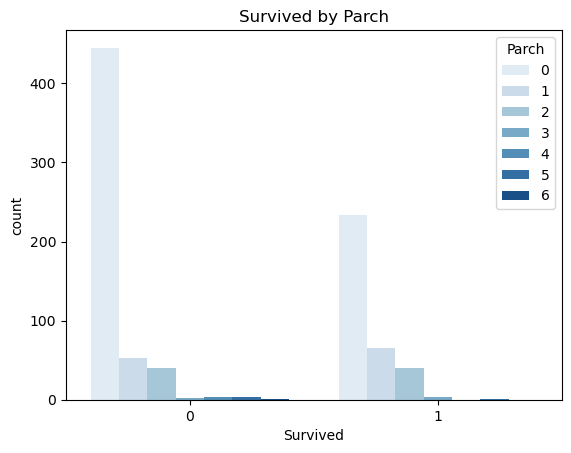

In [ ]:
sns.countplot(x="Survived",hue="Parch",data =df, palette="Blues")
plt.title("Survived by Parch")
plt.show()

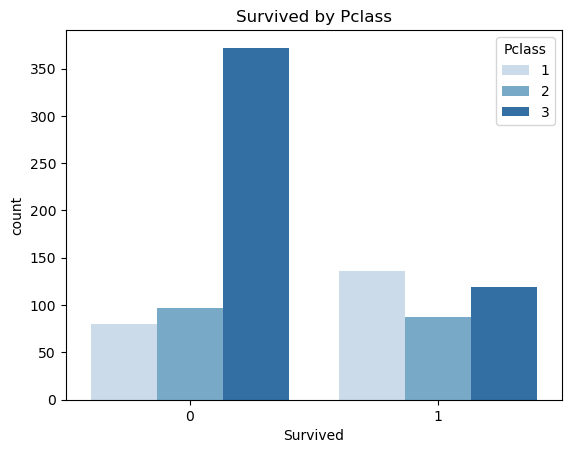

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data =df, palette="Blues")
plt.title("Survived by Pclass")
plt.show()

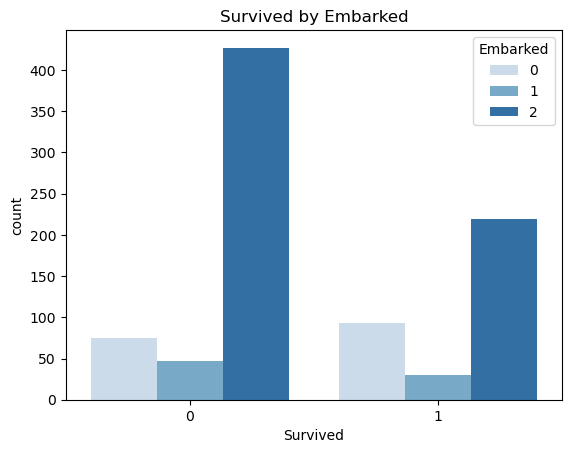

In [ ]:
sns.countplot(x="Survived",hue="Embarked",data =df, palette="Blues")
plt.title("Survived by Embarked")
plt.show()

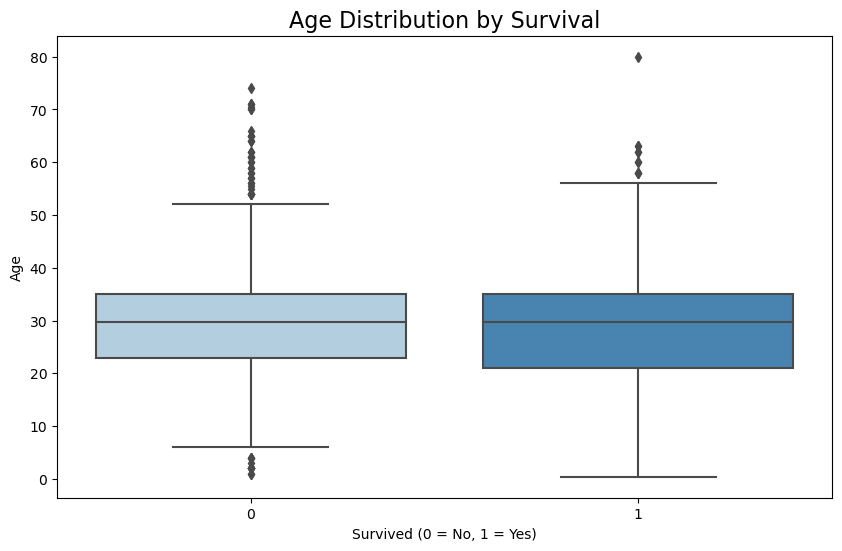

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Survived", y="Age", data=df, palette="Blues")
plt.title("Age Distribution by Survival", fontsize=16)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
LRM = LogisticRegression(penalty = 'l2',max_iter=100,solver= 'newton-cholesky')
LRM

LogisticRegression(solver='newton-cholesky')

In [ ]:
LRM.fit(x_train,y_train)
LRM.score(x_train,y_train)

0.7913322632423756

In [ ]:
test_accuracy = LRM.score(x_test, y_test)
print(test_accuracy)


0.8171641791044776


In [ ]:
y_pred = LRM.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8171641791044776


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[143  24]
 [ 25  76]]


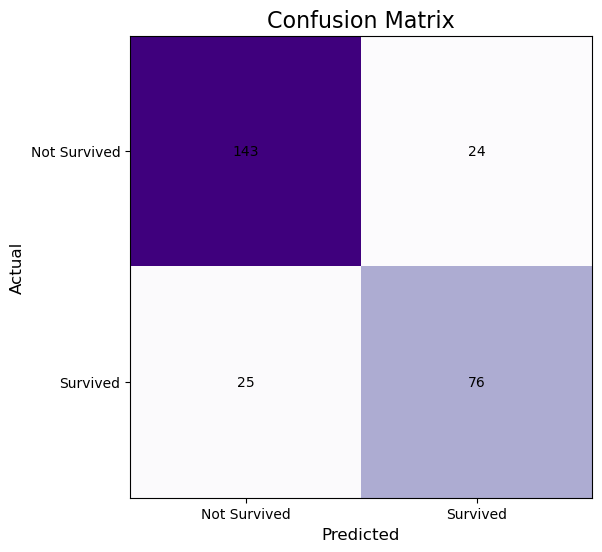

In [ ]:
y_pred = LRM.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(cm, cmap=plt.cm.Purples)
ax.set_title('Confusion Matrix', fontsize=16)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticks(np.arange(len(np.unique(y_test))))
ax.set_yticks(np.arange(len(np.unique(y_test))))
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_yticklabels(['Not Survived', 'Survived'])
for i in range(len(cm)):
    for j in range(len(cm[i])):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()

In [ ]:
SVC = SVC(C=10,kernel="linear")
SVC.fit(x_train,y_train) 

SVC(C=10, kernel='linear')

In [ ]:
SVC.score(x_train,y_train)

0.7961476725521669

In [ ]:
SVC.score(x_test,y_test)

0.8208955223880597

In [ ]:
y_pred = LRM.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1], dtype=int64)

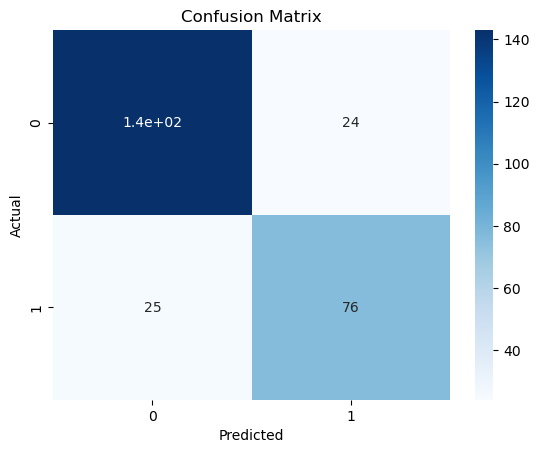

In [ ]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
MLPC = MLPClassifier(activation='identity',solver='lbfgs',alpha=0.0001,batch_size='auto',learning_rate='constant',learning_rate_init=0.001,power_t=0.5,max_iter=200)
                    

In [ ]:
MLPC.fit(x_train, y_train)


C:\Users\FreeComp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='identity', solver='lbfgs')

In [ ]:
MLPC.score(x_test, y_test)
y_pred = MLPC.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.8283582089552238

<Axes: >

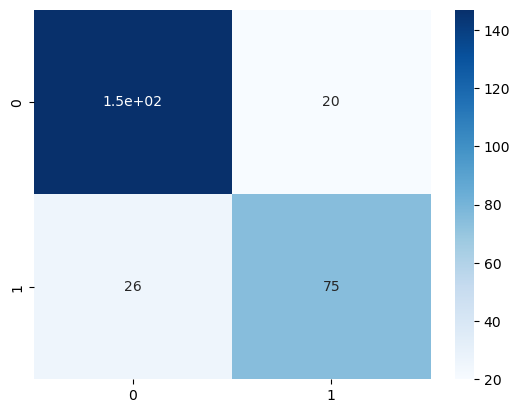

In [ ]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True,cmap="Blues")


In [ ]:
km = KMeans(n_clusters=2)


In [ ]:
x['segment'] = km.fit_predict(x)
x['segment']

C:\Users\FreeComp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    1
888    1
889    1
890    1
Name: segment, Length: 891, dtype: int32

In [ ]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,segment
0,1,3,0,22.000000,1,0,7.2500,2,0
1,2,1,1,38.000000,1,0,71.2833,0,0
2,3,3,1,26.000000,0,0,7.9250,2,0
3,4,1,1,35.000000,1,0,53.1000,2,0
4,5,3,0,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,2,1
887,888,1,1,19.000000,0,0,30.0000,2,1
888,889,3,1,29.699118,1,2,23.4500,2,1
889,890,1,0,26.000000,0,0,30.0000,0,1


In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

81.71641791044776

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


### Model Accuracy: 82%
